In [83]:
from IPython.display import display

import os
os.chdir('C:/Users/Guy/Desktop/NewGridBot/')
display(os.listdir())

import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
sns.color_palette("tab10")
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
data = pd.read_pickle('data/data_btc_eth_ltc.pkl')
data = data.loc['ETH/USD'].close.to_numpy()
half_data = data[:-150000]
display(half_data.shape)

['alpaca_key.json',
 'data',
 'indicators.py',
 'output.png',
 'testing',
 'utils.py',
 '__pycache__']

(186381,)

In [58]:
class SupportResistance():
    
    def kmeans_algorithm(self, data, n_clusters):
        return KMeans(
                n_clusters=n_clusters,
                init='k-means++',
                n_init=10,
                max_iter=300,
                tol=0.0001,
                verbose=0,
                random_state=None,
                copy_x=True,
                algorithm='lloyd'
            ).fit(data.reshape(-1,1))
    
    def K_gessing(self, data):
        inertia = np.array([])
        for i in range(2,10):
            inertia = np.append(inertia, self.kmeans_algorithm(data, i).inertia_)
        return inertia
    
    def set_K(self, inertia):
        grad_inertia = np.abs(np.gradient(inertia))
        return (grad_inertia <= grad_inertia.max()*0.05).argmax()
    
    def set_cluster_df(self, data, K):
        return pd.DataFrame({
            "data": data,
            "cluster": self.kmeans_algorithm(data, K).labels_
        })
        
    def set_support_resistance(self, cluster_df):
        support_resistance = np.array([])
        for cluster in cluster_df.cluster.unique():
            c = cluster_df[cluster_df['cluster'] == cluster]['data'].to_numpy()
            support_resistance = np.append(support_resistance, [c.min(), c.max()])
        return np.sort(support_resistance).reshape((-1,2))
    
    def get_limits(self, last_data):
        for s_p in self.support_resistance:
            if s_p[0] <= last_data <= s_p[1]:
                return s_p
    
    def __init__(self, data):
        self.K_inertia = self.K_gessing(data)
        self.K = self.set_K(self.K_inertia)
        self.cluster_df = self.set_cluster_df(data, self.K)
        self.support_resistance = self.set_support_resistance(self.cluster_df)

In [280]:
kmeans = KMeans(
    n_clusters=2,
    init=np.array([[3000], [4200]]),
    n_init=10,
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='lloyd'
)

In [281]:
kmeans.predict(half_data.reshape(-1,1))

NotFittedError: This KMeans instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [279]:
kmeans.cluster_centers_

array([[2985.85995448],
       [4120.08661349]])

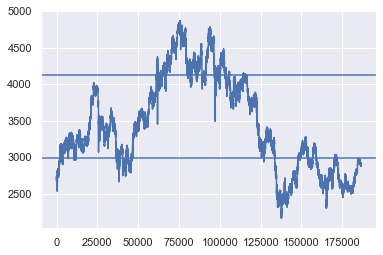

In [224]:
fig = sns.lineplot(data=half_data)
fig.axhline(y=kmeans.cluster_centers_[0])
fig.axhline(y=kmeans.cluster_centers_[1])

<AxesSubplot:ylabel='Count'>

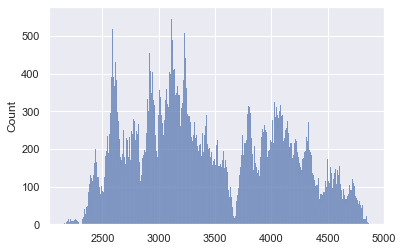

In [201]:
sns.histplot(data=half_data, bins=1000)

In [112]:
from indicators import ExponentialMovingAverage

In [227]:
hist = np.histogram(half_data, bins=100)[0]
hist

array([  42,   97,   86,  130,   51,   53,  288,  510, 1192, 1339, 1664,
       1112,  947, 1809, 2087, 3858, 3997, 2968, 1750, 2096, 2081, 2003,
       2631, 2651, 2028, 1526, 2042, 3285, 3940, 3043, 2101, 3133, 2662,
       3258, 3749, 4950, 3807, 3429, 3024, 4405, 3196, 2570, 2306, 2295,
       2012, 2192, 2677, 2034, 1726, 1738, 1860, 1504, 1786, 1283,  844,
        346,  489, 1306, 2073, 2182, 2973, 2289, 1797, 1437, 1904, 2513,
       2138, 2113, 2598, 2894, 2962, 2703, 2488, 2479, 2009, 2089, 1940,
       1402, 1807, 2273, 2152, 1589, 1178,  954,  714,  925, 1224, 1299,
       1129, 1280, 1272,  872,  666,  859, 1031,  881,  563,  461,  169,
        112], dtype=int64)

In [209]:
for _ in range(10):
    hist = ExponentialMovingAverage(2, hist).ma
    hist = np.array([0 if val <= hist.max()*0.2 else val for val in hist])

array([     0.  ,   1863.81,   3727.62,   5591.43,   7455.24,   9319.05,
        11182.86,  13046.67,  14910.48,  16774.29,  18638.1 ,  20501.91,
        22365.72,  24229.53,  26093.34,  27957.15,  29820.96,  31684.77,
        33548.58,  35412.39,  37276.2 ,  39140.01,  41003.82,  42867.63,
        44731.44,  46595.25,  48459.06,  50322.87,  52186.68,  54050.49,
        55914.3 ,  57778.11,  59641.92,  61505.73,  63369.54,  65233.35,
        67097.16,  68960.97,  70824.78,  72688.59,  74552.4 ,  76416.21,
        78280.02,  80143.83,  82007.64,  83871.45,  85735.26,  87599.07,
        89462.88,  91326.69,  93190.5 ,  95054.31,  96918.12,  98781.93,
       100645.74, 102509.55, 104373.36, 106237.17, 108100.98, 109964.79,
       111828.6 , 113692.41, 115556.22, 117420.03, 119283.84, 121147.65,
       123011.46, 124875.27, 126739.08, 128602.89, 130466.7 , 132330.51,
       134194.32, 136058.13, 137921.94, 139785.75, 141649.56, 143513.37,
       145377.18, 147240.99, 149104.8 , 150968.61, 

In [230]:
half_data.size

186381

In [250]:
hist.shape

(100,)

In [247]:
np.arange(half_data.min(), half_data.max()+(half_data.max() - half_data.min())/100, (half_data.max() - half_data.min())/100)

array([2162.   , 2189.041, 2216.082, 2243.123, 2270.164, 2297.205,
       2324.246, 2351.287, 2378.328, 2405.369, 2432.41 , 2459.451,
       2486.492, 2513.533, 2540.574, 2567.615, 2594.656, 2621.697,
       2648.738, 2675.779, 2702.82 , 2729.861, 2756.902, 2783.943,
       2810.984, 2838.025, 2865.066, 2892.107, 2919.148, 2946.189,
       2973.23 , 3000.271, 3027.312, 3054.353, 3081.394, 3108.435,
       3135.476, 3162.517, 3189.558, 3216.599, 3243.64 , 3270.681,
       3297.722, 3324.763, 3351.804, 3378.845, 3405.886, 3432.927,
       3459.968, 3487.009, 3514.05 , 3541.091, 3568.132, 3595.173,
       3622.214, 3649.255, 3676.296, 3703.337, 3730.378, 3757.419,
       3784.46 , 3811.501, 3838.542, 3865.583, 3892.624, 3919.665,
       3946.706, 3973.747, 4000.788, 4027.829, 4054.87 , 4081.911,
       4108.952, 4135.993, 4163.034, 4190.075, 4217.116, 4244.157,
       4271.198, 4298.239, 4325.28 , 4352.321, 4379.362, 4406.403,
       4433.444, 4460.485, 4487.526, 4514.567, 4541.608, 4568.

<AxesSubplot:>

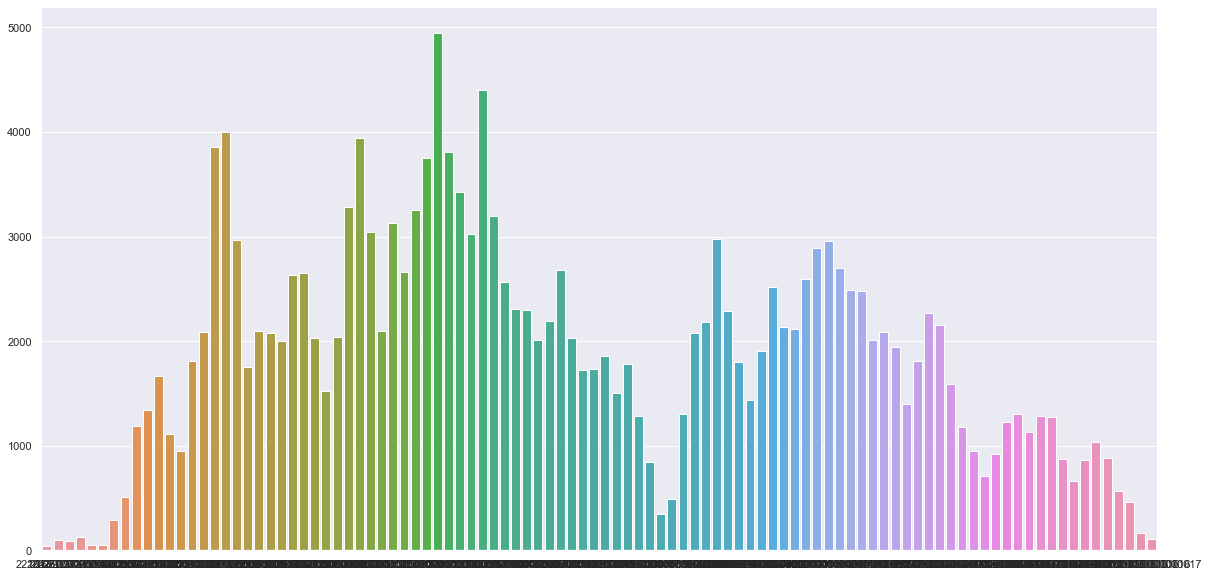

In [251]:
plt.figure(figsize=(20,10))
sns.barplot(y=hist, x=np.arange(half_data.min(), half_data.max(), (half_data.max() - half_data.min())/100))

In [59]:
sp = SupportResistance(data)
sup_res = sp.support_resistance
sp.K

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 


4

<AxesSubplot:ylabel='data'>

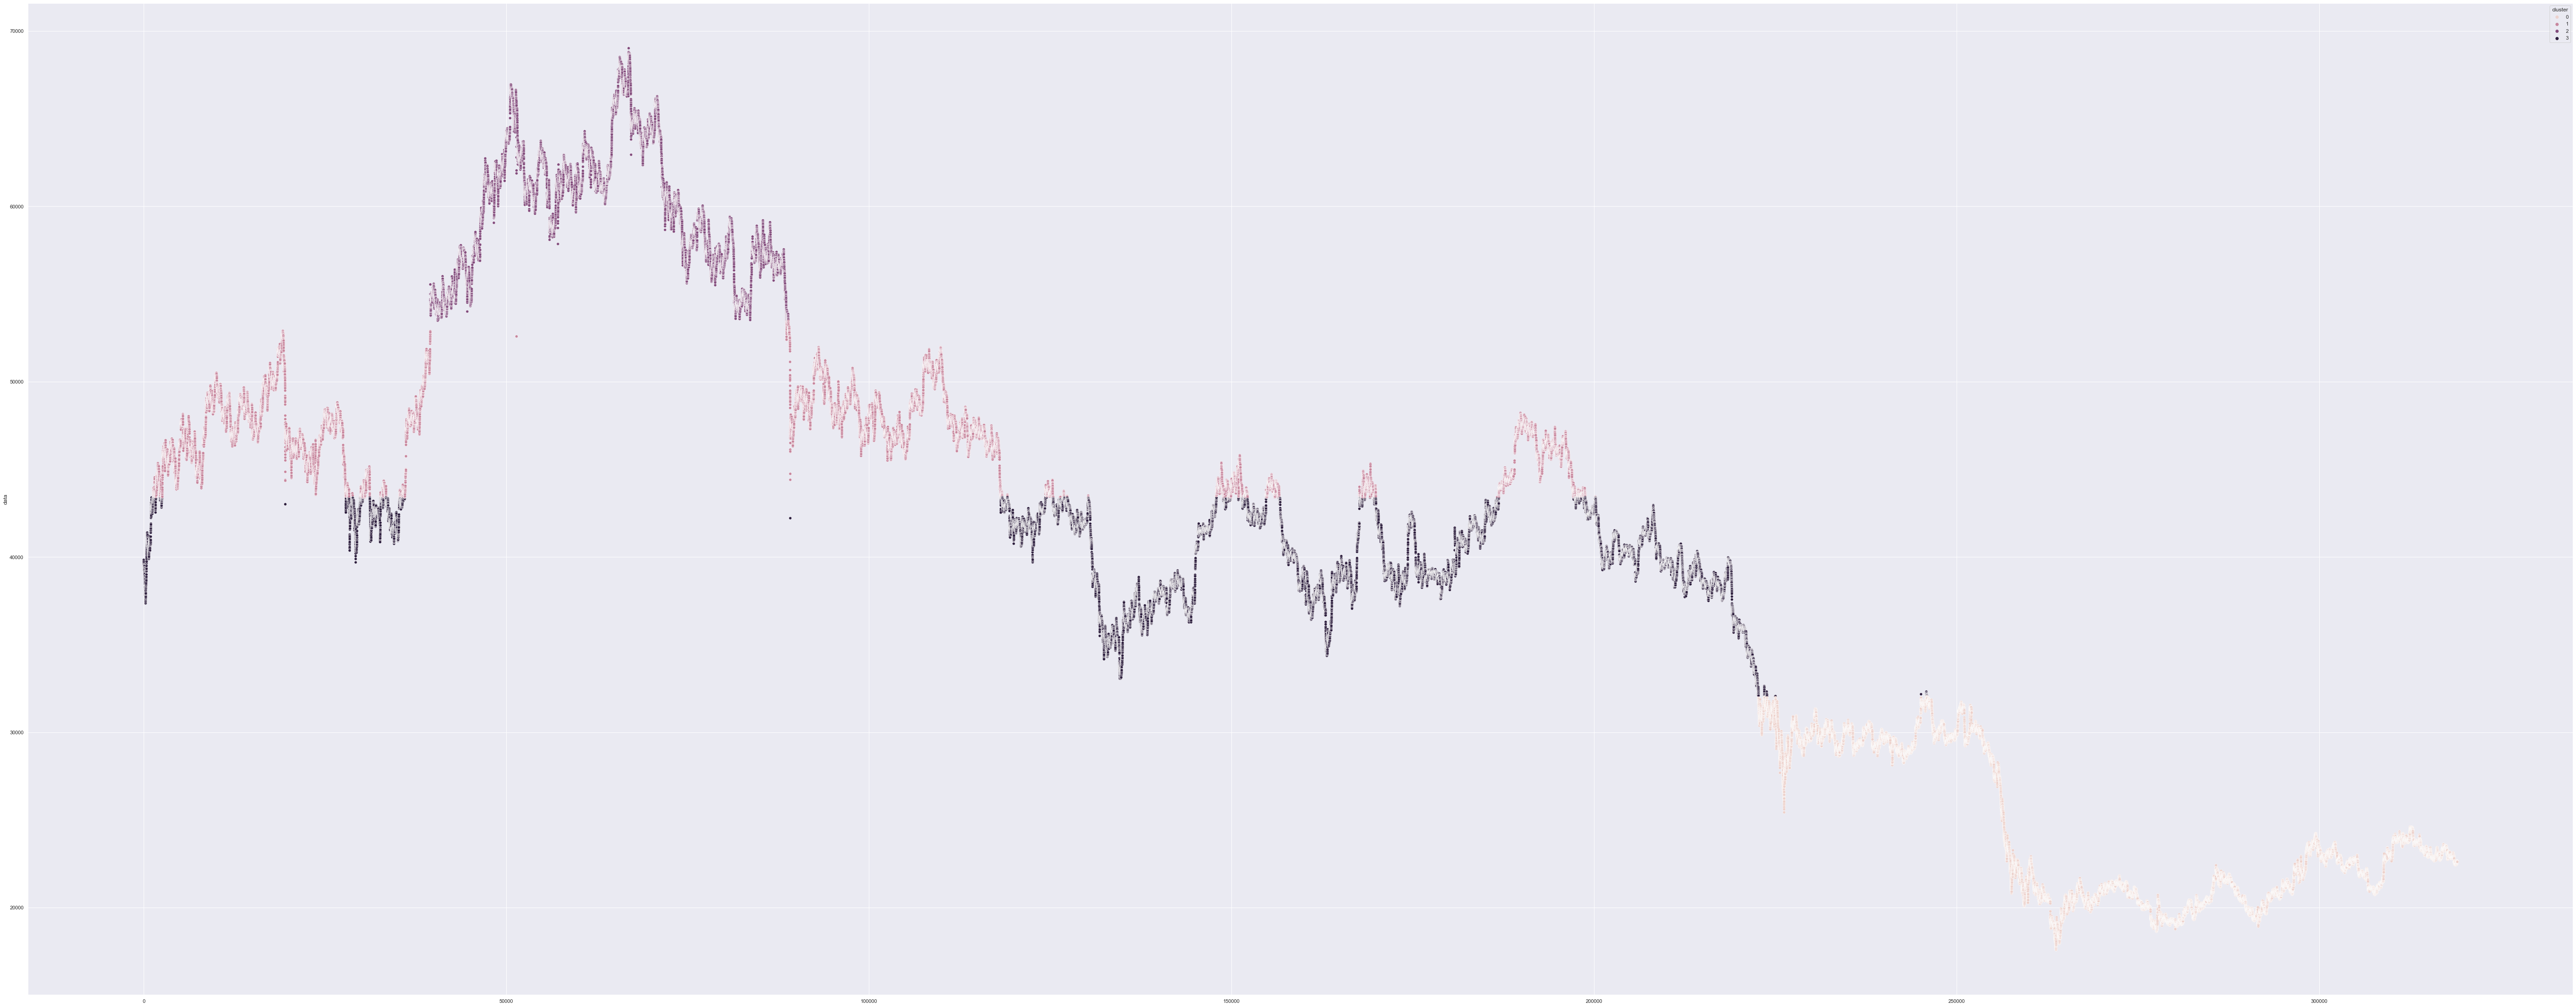

In [60]:
clus = sp.cluster_df
plt.figure(figsize=(100,40))
sns.scatterplot(data=clus, y="data", x=clus.index, hue="cluster")

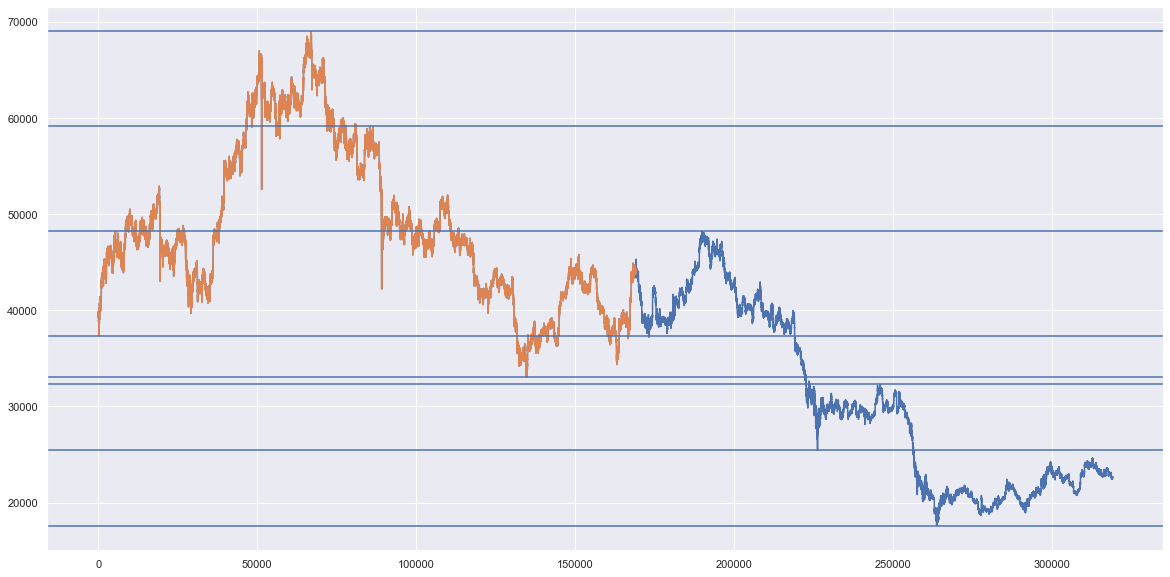

In [46]:
plt.figure(figsize=(20,10))
fig = sns.lineplot(data=data)
sns.lineplot(data=half_data)
for val in sup_res.flatten():
    fig.axhline(y=val)

<AxesSubplot:>

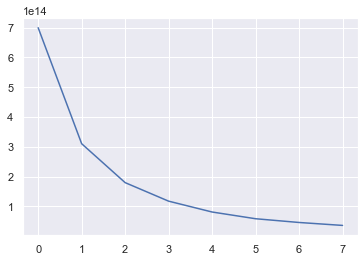

In [44]:
sns.lineplot(data=sp.K_inertia)